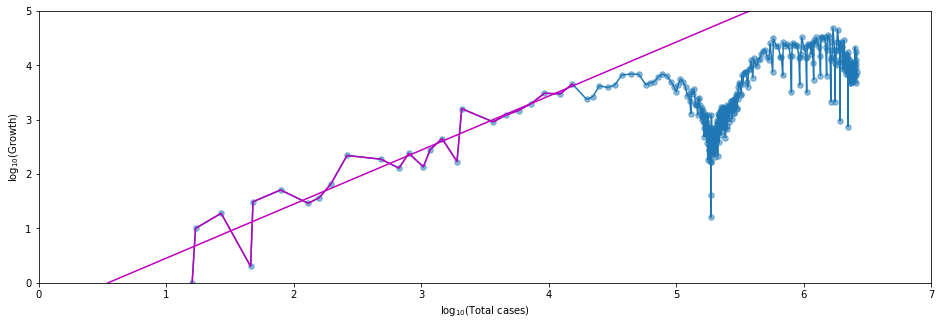

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import pandas as pd

url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

total = pd.read_csv(url, index_col=1, parse_dates=True)
total = total.transpose()
total = total['Germany']
total = total[36:]
        
growth=[total[i+1]-total[i] for i in range(len(total)-1)]

total = np.asarray(total)
growth = np.asarray(growth)

x = np.log10(total.astype(np.float64))
y = np.log10(growth.astype(np.float64))

gradient, intercept, r_value, p_value, std_err = linregress(x[:25],y[:25])

fig, ax = plt.subplots(figsize=(16,5))

ax.set_xlim(0,7)
ax.set_ylim(0,5)
ax.set_xlabel('log$_{10}$(Total cases)')
ax.set_ylabel('log$_{10}$(Growth)')

ax.scatter(x[:len(x)-1], y, alpha=0.5, s=30)
ax.plot(x[:len(x)-1], y)
ax.plot((x[:25]),(y[:25]),'m')

x = np.linspace(0, x[len(x)-1], 2)
ax.plot(x, (gradient * x) + intercept,'m')
